In [84]:
import numpy as np
import pandas as pd

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly import __version__
%matplotlib inline

In [86]:
df = pd.read_csv('911.csv')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [88]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [89]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [90]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [91]:
df['Reason']=df['title'].apply(lambda x: x.split(':')[0])

In [92]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic


In [93]:
rea = df['Reason'].value_counts()

In [94]:
rea

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

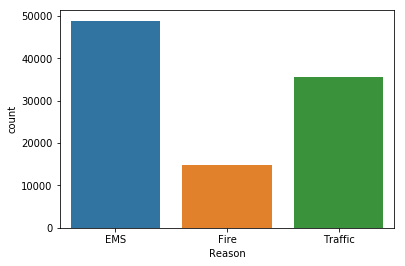

In [95]:
sns.countplot(x='Reason',data=df)

In [96]:
type(df['timeStamp'])

pandas.core.series.Series

In [97]:
df['timestamp']=pd.to_datetime(df['timeStamp'])

In [98]:
df['timestamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
5       2015-12-10 17:40:01
6       2015-12-10 17:40:01
7       2015-12-10 17:40:01
8       2015-12-10 17:40:01
9       2015-12-10 17:40:01
10      2015-12-10 17:40:01
11      2015-12-10 17:40:02
12      2015-12-10 17:40:02
13      2015-12-10 17:40:02
14      2015-12-10 17:40:02
15      2015-12-10 17:40:02
16      2015-12-10 17:46:01
17      2015-12-10 17:47:01
18      2015-12-10 17:47:01
19      2015-12-10 17:47:02
20      2015-12-10 17:47:02
21      2015-12-10 17:57:02
22      2015-12-10 18:02:01
23      2015-12-10 18:02:02
24      2015-12-10 18:02:02
25      2015-12-10 18:06:25
26      2015-12-10 18:06:25
27      2015-12-10 18:06:25
28      2015-12-10 18:06:26
29      2015-12-10 18:11:01
                ...        
99462   2016-08-24 09:41:00
99463   2016-08-24 09:42:00
99464   2016-08-24 09:51:06
99465   2016-08-24 09:56:13
99466   2016-08-24 1

In [132]:
df['hour']= df['timestamp'].apply(lambda time: time.hour )
df['month']= df['timestamp'].apply(lambda time: time.month )
df['day of week']= df['timestamp'].apply(lambda time: time.dayofweek )

In [133]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day of week']=df['day of week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timestamp,day,month,day of week,date,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,10,12,Thu,2015-12-10,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,10,12,Thu,2015-12-10,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,10,12,Thu,2015-12-10,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,10,12,Thu,2015-12-10,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,10,12,Thu,2015-12-10,17


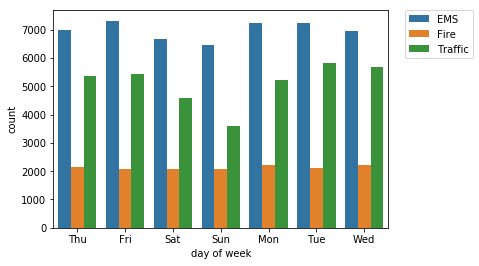

In [134]:
sns.countplot(x='day of week',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

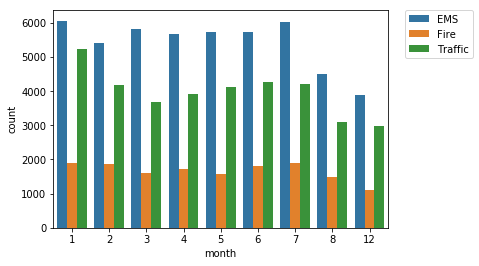

In [135]:
sns.countplot(x='month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [136]:
bymonth = df.groupby('month').count()

In [137]:
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timestamp,day,day of week,date,hour
month,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423


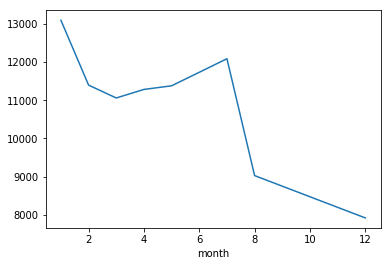

In [138]:
bymonth['addr'].plot()

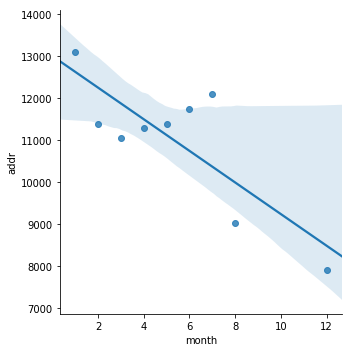

In [139]:
sns.lmplot(x='month',y='addr',data=bymonth.reset_index())

In [140]:
df['date'] = df['timestamp'].apply(lambda time:time.date())

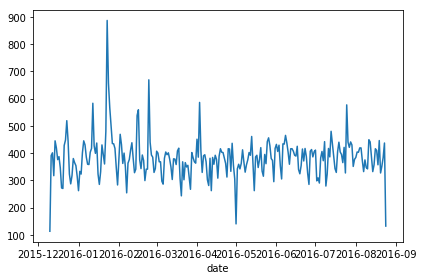

In [141]:
df.groupby('date').count()['addr'].plot()
plt.tight_layout()

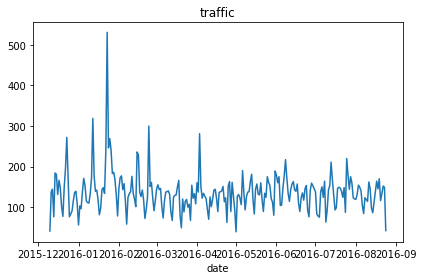

In [142]:
df[df['Reason']=='Traffic'].groupby('date').count()['addr'].plot()
plt.title('traffic')
plt.tight_layout()

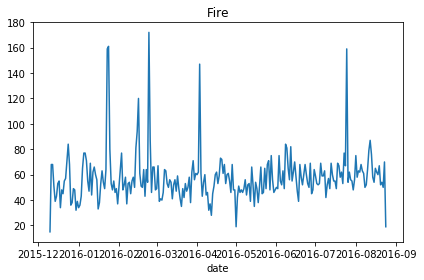

In [143]:
df[df['Reason']=='Fire'].groupby('date').count()['addr'].plot()
plt.title('Fire')
plt.tight_layout()

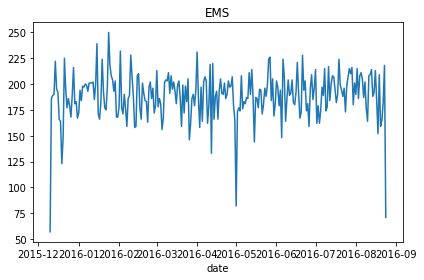

In [144]:
df[df['Reason']=='EMS'].groupby('date').count()['addr'].plot()
plt.title('EMS')
plt.tight_layout()

In [145]:
dayhour = df.groupby(by=['day of week','day']).count()['Reason'].unstack()

In [146]:
dayhour.head()

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,1130.0,NaN,431.0,368.0,824.0,415.0,NaN,1173.0,NaN,404.0,...,1236.0,NaN,387.0,678.0,396.0,429.0,NaN,1208.0,NaN,NaN
Mon,758.0,343.0,NaN,1101.0,NaN,435.0,381.0,741.0,357.0,NaN,...,732.0,398.0,NaN,1573.0,NaN,407.0,782.0,343.0,295.0,NaN
Sat,NaN,1019.0,NaN,356.0,297.0,728.0,369.0,NaN,946.0,NaN,...,NaN,1698.0,NaN,331.0,609.0,387.0,382.0,NaN,1010.0,NaN
Sun,140.0,NaN,1219.0,NaN,307.0,286.0,587.0,332.0,NaN,1010.0,...,316.0,NaN,1303.0,NaN,286.0,585.0,330.0,373.0,NaN,664.0
Thu,NaN,406.0,368.0,788.0,362.0,NaN,1154.0,NaN,441.0,521.0,...,NaN,419.0,795.0,447.0,458.0,NaN,1320.0,NaN,408.0,682.0


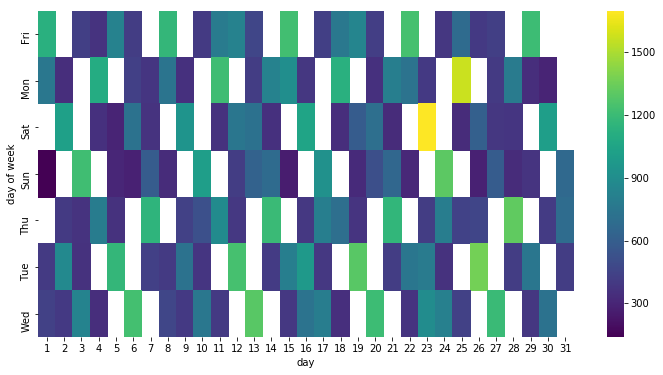

In [152]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour,cmap='viridis')

ValueError: The condensed distance matrix must contain only finite values.

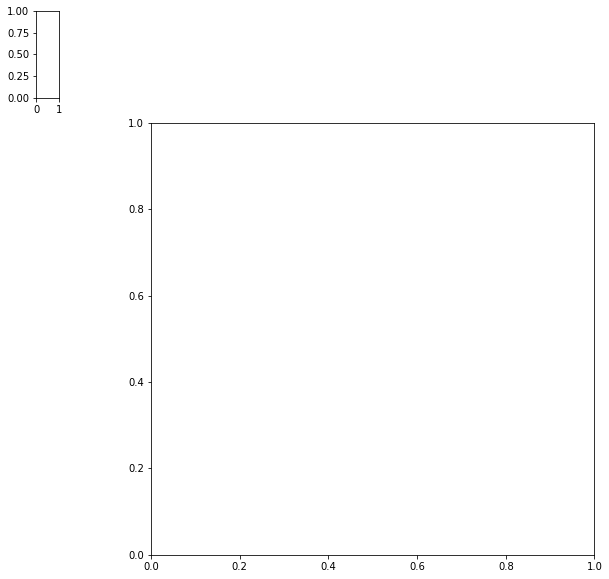

In [155]:
sns.clustermap(dayhour,cmap='viridis')